In [79]:
# Sample dataset: A small collection of sentences
sentences = [
    "jon snow pledges his loyalty to daenerys targaryen",
    "arya stark trains to become a faceless assassin",
    "cersei lannister sits on the iron throne in king's landing",
    "the night king leads an army of white walkers beyond the wall",
    "tyrion lannister advises daenerys targaryen on her conquest of westeros"
]


In [80]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


# Tokenize the sentences into words
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

tokenized_sentences = [[word for word in sentence if word not in STOPWORDS] for sentence in tokenized_sentences]


In [81]:
from gensim.models import Word2Vec

# Training the Word2Vec model using CBOW
model_cbow = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, sg=0)

# Training the Word2Vec model using Skip-Gram
model_skipgram = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, sg=1)

In [82]:
# Get the vector for a word from the CBOW model
vector_king_cbow = model_cbow.wv['throne']

# Get the vector for a word from the Skip-Gram model
vector_king_skipgram = model_skipgram.wv['throne']


In [83]:
vector_king_skipgram

array([ 0.00180023,  0.00704609,  0.0029447 , -0.00698085,  0.00771268,
       -0.00598893,  0.00899771,  0.0029592 , -0.00401529, -0.00468899,
       -0.00441672, -0.00614646,  0.00937874, -0.0026496 ,  0.00777244,
       -0.00968034,  0.00210879, -0.00123361,  0.00754423, -0.0090546 ,
        0.00743756, -0.0051058 , -0.00601377, -0.00564916, -0.00337917,
       -0.0034111 , -0.00319566, -0.0074922 ,  0.00070878, -0.00057607,
       -0.001684  ,  0.00375713, -0.00762019, -0.00322142,  0.00515534,
        0.00854386, -0.00980994,  0.00719534,  0.00530949, -0.0038797 ,
        0.00857616, -0.00922199,  0.00724868,  0.00536383,  0.00129359,
       -0.00519975, -0.00417865, -0.00335678,  0.00160829,  0.0015867 ,
        0.00738824,  0.00997759,  0.00886734, -0.00400645,  0.00964539,
       -0.00062954,  0.00486543,  0.00254902, -0.00062981,  0.00366745,
       -0.00531941, -0.00575668, -0.00760464,  0.00190643,  0.00652587,
        0.00088213,  0.00125695,  0.0031716 ,  0.00813467, -0.00

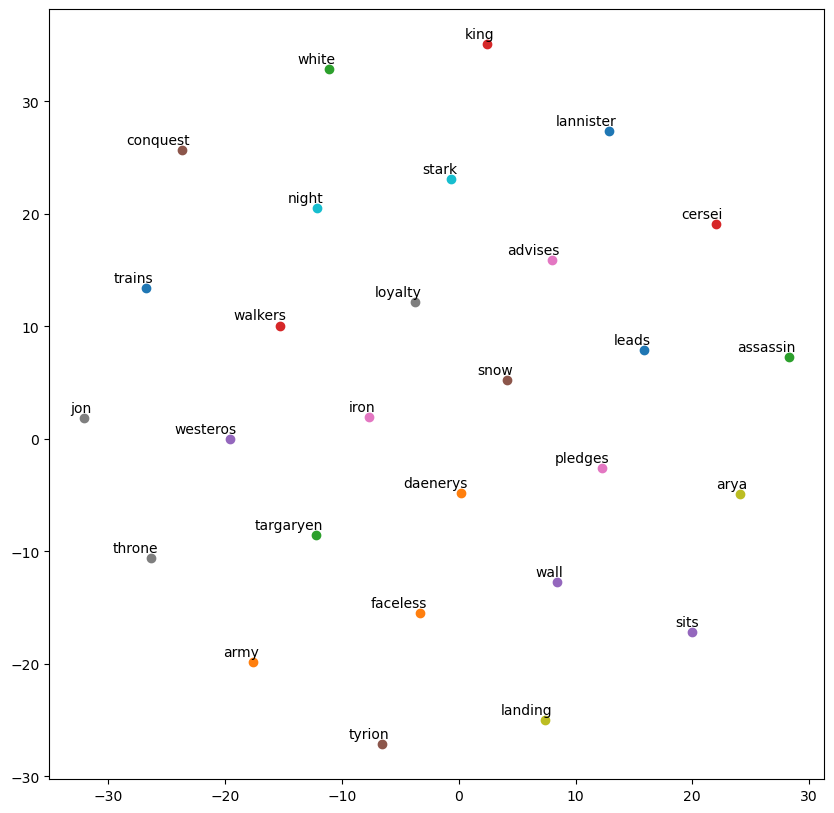

In [84]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Retrieve all vectors from the CBOW model
word_vectors_cbow = model_cbow.wv.vectors

# # Use t-SNE to reduce dimensions to 2

# Assuming 'word_vectors_cbow' is a list of word vectors from your Word2Vec model
num_samples = len(word_vectors_cbow)
tsne_perplexity = min(30, num_samples - 1)  # Perplexity must be less than the number of samples

tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=0)
word_vectors_cbow_2d = tsne.fit_transform(word_vectors_cbow)

# Plot the vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(model_cbow.wv.index_to_key):
    plt.scatter(word_vectors_cbow_2d[i, 0], word_vectors_cbow_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_cbow_2d[i, 0], word_vectors_cbow_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

In [85]:
# Find most similar words to 'king' in the CBOW model
similar_words_cbow = model_cbow.wv.most_similar(positive=[vector_king_cbow], topn=5)

# Find most similar words to 'king' in the Skip-Gram model
similar_words_skipgram = model_skipgram.wv.most_similar(positive=[vector_king_skipgram], topn=5)

# Print the similar words along with their similarity scores
print("Similar words to 'throne' in CBOW model:", similar_words_cbow)
print("Similar words to 'throne' in Skip-Gram model:", similar_words_skipgram)

Similar words to 'throne' in CBOW model: [('throne', 0.9999999403953552), ('sits', 0.24664445221424103), ('landing', 0.11936754733324051), ('loyalty', 0.11933054774999619), ('cersei', 0.11662198603153229)]
Similar words to 'throne' in Skip-Gram model: [('throne', 0.9999999403953552), ('sits', 0.24668174982070923), ('landing', 0.1193675771355629), ('loyalty', 0.11931648850440979), ('cersei', 0.11662198603153229)]
